In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from imutils import paths
import keras
from keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential,Model

C:\Users\Code_love_r\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DIRECTORY = r"C:\Users\Code_love_r\Desktop\Face_mask\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [3]:
data = []
labels = []

In [4]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

C:\Users\Code_love_r\Anaconda3\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [5]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
labels = lb.fit_transform(labels)

In [6]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [7]:
labels[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [8]:
type(data)

list

In [9]:
data = np.array(data, dtype="float32")

In [10]:
labels = np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

Data Augmentation

In [12]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [13]:
from tensorflow.keras.applications import MobileNetV2

In [18]:
from keras.layers import Activation

model=Sequential()

model.add(Convolution2D(200,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Convolution2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W1010 10:43:53.186586 11124 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1010 10:43:53.477780 11124 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1010 10:43:53.552396 11124 deprecation.py:506] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1010 10:43:53.724148 11124 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\optimizers.p

In [21]:
history=model.fit_generator(aug.flow(trainX, trainY, batch_size=32),steps_per_epoch=len(trainX) // 32,validation_data=(testX, testY),validation_steps=len(testX) // 32,epochs=10)

W1010 10:57:09.551180 11124 deprecation.py:323] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
95/95 [==============================] - 841s 9s/step - loss: 0.6989 - acc: 0.8286 - val_loss: 0.1944 - val_acc: 0.9439
Epoch 2/10
95/95 [==============================] - 675s 7s/step - loss: 0.2849 - acc: 0.8944 - val_loss: 0.2136 - val_acc: 0.9283
Epoch 3/10
95/95 [==============================] - 660s 7s/step - loss: 0.2811 - acc: 0.8908 - val_loss: 0.2125 - val_acc: 0.9270
Epoch 4/10
95/95 [==============================] - 1473s 16s/step - loss: 0.2451 - acc: 0.9096 - val_loss: 0.1715 - val_acc: 0.9322
Epoch 5/10
95/95 [==============================] - 666s 7s/step - loss: 0.2299 - acc: 0.9157 - val_loss: 0.2132 - val_acc: 0.9283
Epoch 6/10
95/95 [==============================] - 664s 7s/step - loss: 0.2385 - acc: 0.9090 - val_loss: 0.1930 - val_acc: 0.9413
Epoch 7/10
95/95 [==============================] - 669s 7s/step - loss: 0.2489 - acc: 0.9026 - val_loss: 0.1870 - val_acc: 0.9309
Epoch 8/10
95/95 [==============================] - 764s 8s/step - loss: 0.2453 -

In [22]:
predIdxs = model.predict(testX, batch_size=32)

In [24]:
predIdxs = np.argmax(predIdxs, axis=1)

In [29]:
model.save("mask_detector1.model")

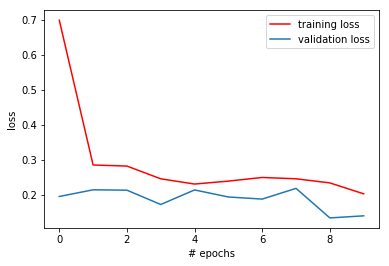

In [30]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

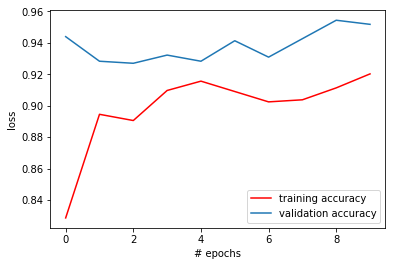

In [32]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
print(model.evaluate(testX,testY))

767/767 [==============================] - 53s 69ms/step
[0.139074540428691, 0.9517601043024772]
